In [ ]:
# Clone the repository
!git clone https://github.com/jazxmok/UTMStudy.git

#clone into UTMStudy
%cd UTMStudy

import pandas as pd

# Load and display the CSV file
df = pd.read_csv('Flat prices.csv')
print(df.head())


Cloning into 'UTMStudy'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 1.22 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/UTMStudy
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 yea

In [ ]:
# Check the actual column names in your DataFrame
print(df.columns)

# Correct any typos in the list of columns to drop, if necessary
# For example, if 'Street Name' is actually 'Street_Name', change it accordingly
columns_to_drop = ['town','flat_type','block','street_name','storey_range','flat_model','lease_commence_date','remaining_lease']

# Drop the columns
data = df.drop(columns_to_drop, axis=1)

# Proceed with the rest of your analysis
data.iloc[:, 1:-1].describe()

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'floor_area_sqm', 'resale_price'], dtype='object')


,floor_area_sqm
count,92270.000000
mean,97.768362
std,24.263575
min,31.000000
25%,82.000000
50%,95.000000
75%,113.000000
max,249.000000


<ipython-input-17-a1ccce30103d>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,count)


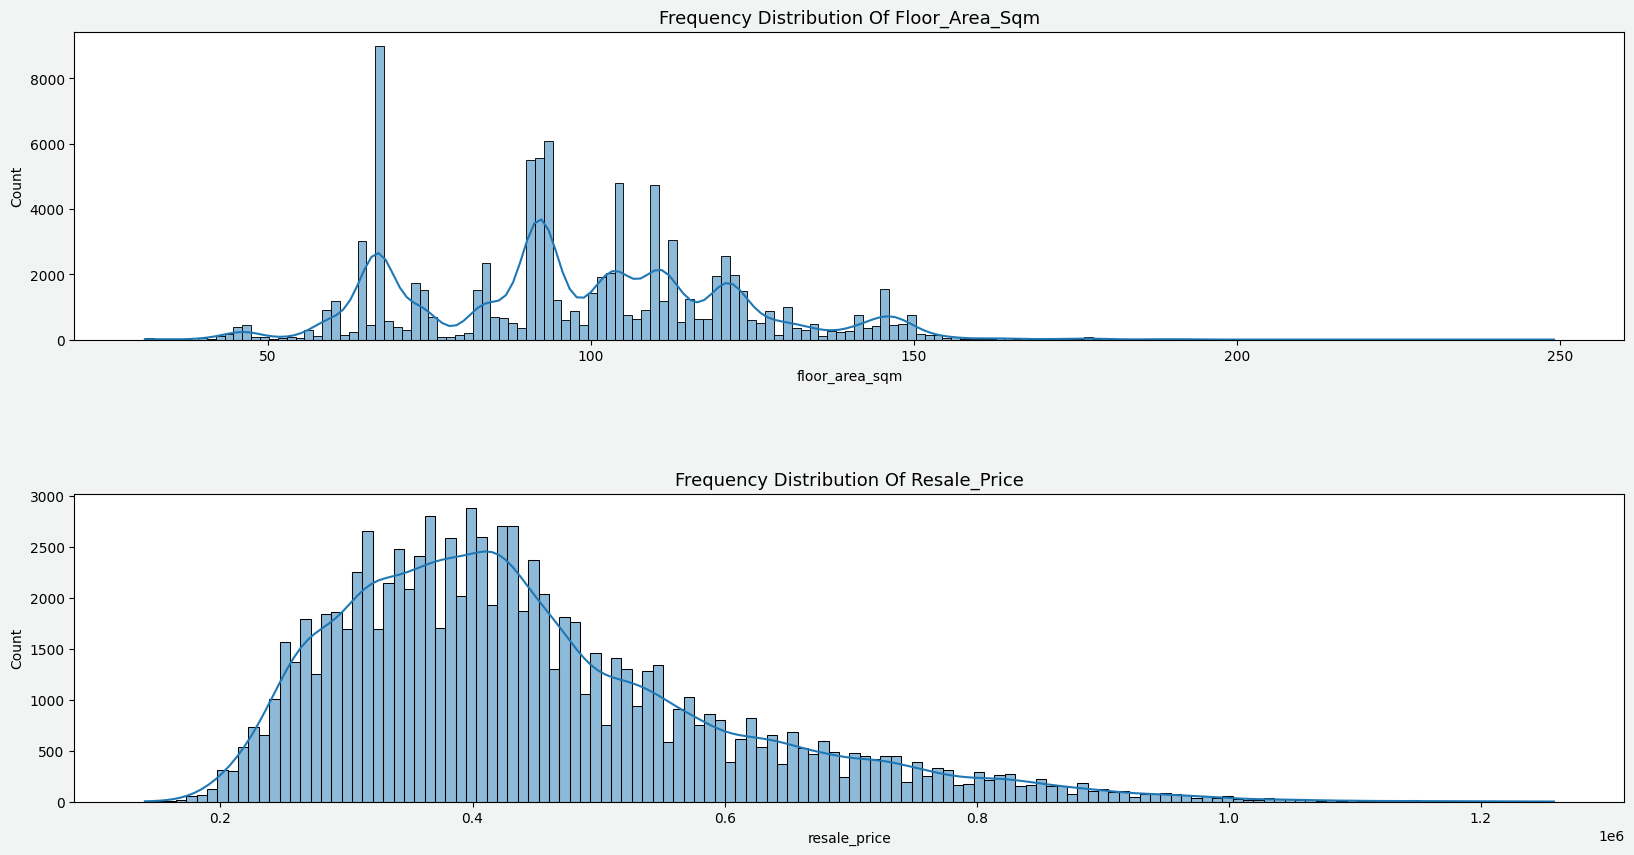

In [ ]:
# Plotting multiple graphs in a grid
# Exploring the distribution of numeric columns using cumulative frequency distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,16), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count=1
ls = ['floor_area_sqm', 'resale_price']
for i in ls:
    plt.subplot(3,1,count)
    h = sns.histplot(x=i, kde=True, data= data)
    h.set_title(('frequency distribution of ' + i).title(), fontsize=13)
    count+=1

Using KNN and Decision Tree Method to Train the Model but the Result is Not Good

In [ ]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data['resale_price'] = data['resale_price'].astype(int)
# create dummy variables for categorical variables
dummy = pd.DataFrame(pd.get_dummies(data[['month']]))

# for normalizing data
from sklearn.preprocessing import scale
normalizing_data = pd.DataFrame(scale(data[['floor_area_sqm']]),
         columns=['floor_area_sqm'])

# create new datafame for modeling
normalizing_final = pd.concat([dummy,data[['resale_price']]],
                        axis=1)

# Split data into output and input
X = normalizing_final.iloc[:,:-1] # inputs
Y = normalizing_final['resale_price'] # outputs

# Split data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,shuffle=True)

# append different classification models into classifiers array
classifiers=[]
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifiers.append(KNN_model)
DT_model = DT(criterion = 'entropy',max_depth=4)
classifiers.append(DT_model)

from sklearn.metrics import accuracy_score
accuracy_train = []
accuracy_test = []
for clf in classifiers:
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(Y_train, pred_train)
    acc_test = accuracy_score(Y_test, pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)
accuracy_result = pd.DataFrame(data={'Model':['KNN','Decision Tree'],
                                     'Training Accuracy':accuracy_train,
                                     'Testing Accuracy':accuracy_test})
accuracy_result.sort_values('Testing Accuracy',ascending=False)



,Model,Training Accuracy,Testing Accuracy
1,Decision Tree,0.014812,0.013395
0,KNN,0.005982,0.005375


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Training Accuracy'].plot(kind='hist', bins=20, title='Training Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Testing Accuracy'].plot(kind='hist', bins=20, title='Testing Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Training Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Training Accuracy', y='Testing Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Training Accuracy'].plot(kind='line', figsize=(8, 4), title='Training Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Testing Accuracy'].plot(kind='line', figsize=(8, 4), title='Testing Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Training Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Testing Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Linear Regression Method

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'normalizing_final' is your preprocessed dataset
X = normalizing_final.iloc[:,:-1]  # inputs
Y = normalizing_final['resale_price']  # output

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

# Linear Regression model with early stopping based on validation error
best_val_rmse = float('inf')
best_model = None
patience = 5  # Number of epochs to wait for improvement

# Example of training loop with early stopping
for epoch in range(100):  # Example of 100 epochs, adjust as needed
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Calculate RMSE on validation set
    pred_val = model.predict(X_test)
    val_rmse = mean_squared_error(Y_test, pred_val, squared=False)  # Use RMSE for early stopping

    # Early stopping condition
    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        best_model = model
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch} with best validation RMSE: {best_val_rmse}')
            break

# Evaluate the best model on training and test sets
train_rmse = mean_squared_error(Y_train, best_model.predict(X_train), squared=False)
test_rmse = mean_squared_error(Y_test, best_model.predict(X_test), squared=False)

# Create DataFrame to display results
accuracy_result = pd.DataFrame(data={
    'Model': ['Linear Regression'],
    'Training RMSE': [train_rmse],
    'Testing RMSE': [test_rmse]
})

# Display the accuracy results
print(accuracy_result)


Early stopping at epoch 5 with best validation RMSE: 153733.42735915558
               Model  Training RMSE   Testing RMSE
0  Linear Regression  154310.307534  153733.427359
